In [1]:
from tensorflow.keras.datasets import reuters # 로이터 뉴스 데이터
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test)= reuters.load_data()
# 46개 이상의 주제로 11,228개 기사
# 전처리(수치화) 된 데이터

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
print(len(X_train))
print(len(X_test))

8982
2246


In [ ]:
# 첫번째 기사
X_train[0]

# 빈도수를 기준으로 수치화 된 상태
# 작은 숫자(3, 5, 10 등) -> 뉴스에 자주 등장함!
# 높은 숫자 (27595, 28842 등) -> 뉴스 기자에 자주 등장하지 않음!

In [ ]:
reuters.get_word_index()

In [9]:
(X_train, y_train), (X_test, y_test)= reuters.load_data(num_words = 10)
# 빈도 높은 10개 단어 제외, 전부 2로 바꿈

In [ ]:
X_train[1000]

In [4]:
(X_train, y_train), (X_test, y_test)= reuters.load_data(num_words = 1000)

In [5]:
print(np.unique(y_train))
print(len(np.unique(y_train)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
46


### RNN 학습
- RNN을 이용해 뉴스 기사를 보고 46가지 카테고리 중 어디에 속하는지 예측하는 모델을 만들어보자

### 학습을 위해 데이터 모양 맞추기
(sample, time step, feature)

In [17]:
len(X_train[0])

87

In [19]:
len(X_train[100])

409

In [20]:
len(X_train[10])

31

In [6]:
# 시퀀스 길이 맞추기
X_train_len = [ len(doc) for doc in X_train ]
# X_train의 뉴스 기사 길이를 전부 측정해서 리스트에 담고 X_train_len 변수에 할당

# <한줄 for문 풀어쓴것>
# X_train_len = []
# for doc in X_train :
#  X_train_len.append(len(doc))

In [7]:
print('최소 : ', min(X_train_len))
print('최대 : ', max(X_train_len))
print('평균 : ', np.mean(X_train_len))
print('중앙값 : ', np.median(X_train_len))
# 너무 적거나, 많지 않은 110 ~ 120 정도의 단어를 RNN에 입력 받도록 해보자!

최소 :  13
최대 :  2376
평균 :  145.5398574927633
중앙값 :  95.0


In [8]:
import matplotlib.pyplot as plt

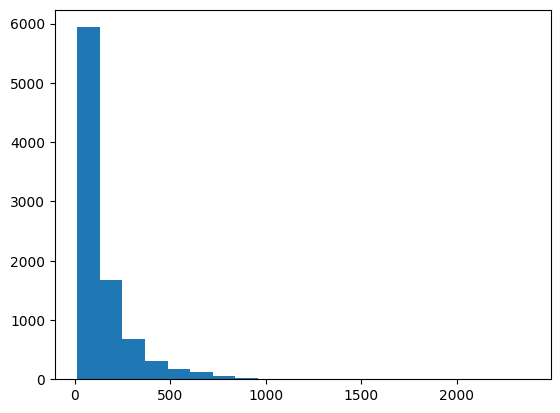

In [9]:
plt.hist(X_train_len, bins = 20)
plt.show()

In [10]:
from tensorflow.keras.preprocessing import sequence

In [11]:
# 데이터 전처리
# 각 기사의 단어 수가 다르기 때문에 단어의 갯수(숫자)를 맞춰주자
X_train_pad = sequence.pad_sequences(X_train, maxlen = 120)
X_test_pad = sequence.pad_sequences(X_test, maxlen = 120)

In [30]:
X_train_pad.shape, X_test_pad.shape

((8982, 120), (2246, 120))

In [33]:
X_train_pad[1000]

array([199,   8,  68,   2,  13,   2,  60,   2,   8,  10, 295,   2, 127,
       108,   2, 587, 114,  13,   2,  30,   2, 136,   4, 314,   2,  43,
        10,   2, 227,   2, 618,   4,   2,  24,   4,   2,  91,  30,   2,
         2, 700,  73,   2,  33,   2, 127, 171, 483,  34,   2, 509,  57,
         2,   6, 382, 323,   2,   9,   2,  13,  10, 382, 495,   2, 117,
         4,  54,  78, 206,   7, 809,   6, 616,   2, 682,   2,  51,  43,
       125, 732, 244,  23,   2, 808,   2, 893,   2,  33,   2,   2, 127,
         2,   2,   5,   2,   2,   7,   4, 815, 218,   5, 227,   2, 107,
        77,  55,   2,   6, 439,  95,   2,   7,   4, 567,   2,   4, 199,
       152,  17,  12], dtype=int32)

In [12]:
len(X_train[1000])

626

In [13]:
X_train_pad_reshape = X_train_pad.reshape(8982, 120, 1)
X_test_pad_reshape = X_test_pad.reshape(2246, 120, 1)

### 모델 설계 및 학습

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN

In [15]:
model = Sequential()
model.add(InputLayer(input_shape = (120, 1)))
model.add(SimpleRNN(128))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))

In [16]:
# 모델 학습/평가 방법
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [18]:
history = model.fit(X_train_pad_reshape,y_train, validation_split = 0.3, epochs = 20 )

Epoch 1/20
197/197 [==============================] - 17s 84ms/step - loss: 2.4974 - accuracy: 0.3461 - val_loss: 2.3716 - val_accuracy: 0.3562
Epoch 2/20
197/197 [==============================] - 17s 87ms/step - loss: 2.3901 - accuracy: 0.3641 - val_loss: 2.3669 - val_accuracy: 0.3699
Epoch 3/20
197/197 [==============================] - 17s 87ms/step - loss: 2.3666 - accuracy: 0.3724 - val_loss: 2.3406 - val_accuracy: 0.3607
Epoch 4/20
197/197 [==============================] - 16s 82ms/step - loss: 2.3399 - accuracy: 0.3878 - val_loss: 2.3088 - val_accuracy: 0.3748
Epoch 5/20
197/197 [==============================] - 18s 92ms/step - loss: 2.3139 - accuracy: 0.3871 - val_loss: 2.2815 - val_accuracy: 0.3829
Epoch 6/20
197/197 [==============================] - 16s 82ms/step - loss: 2.2924 - accuracy: 0.3873 - val_loss: 2.2526 - val_accuracy: 0.3967
Epoch 7/20
197/197 [==============================] - 19s 99ms/step - loss: 2.2623 - accuracy: 0.3997 - val_loss: 2.2868 - val_accuracy:

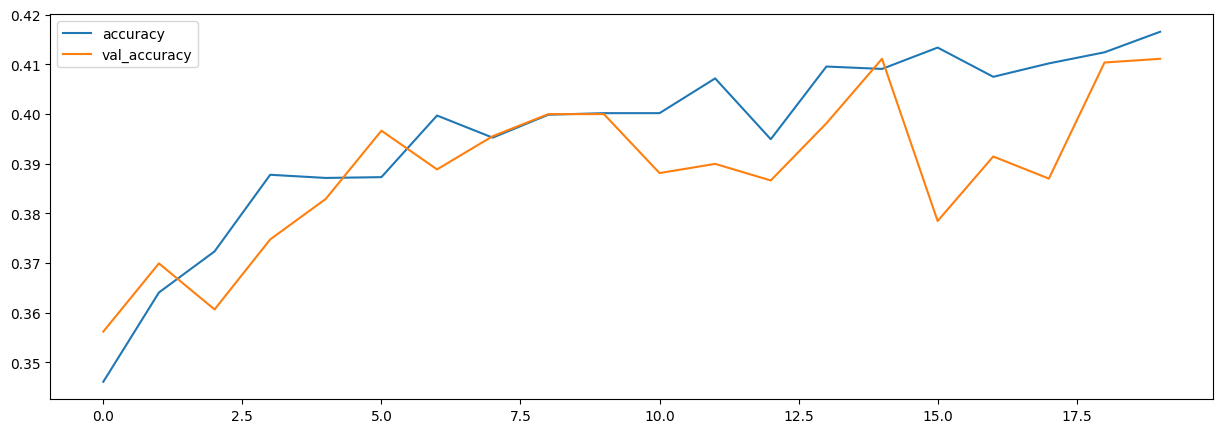

In [19]:
plt.figure(figsize = (15,5))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

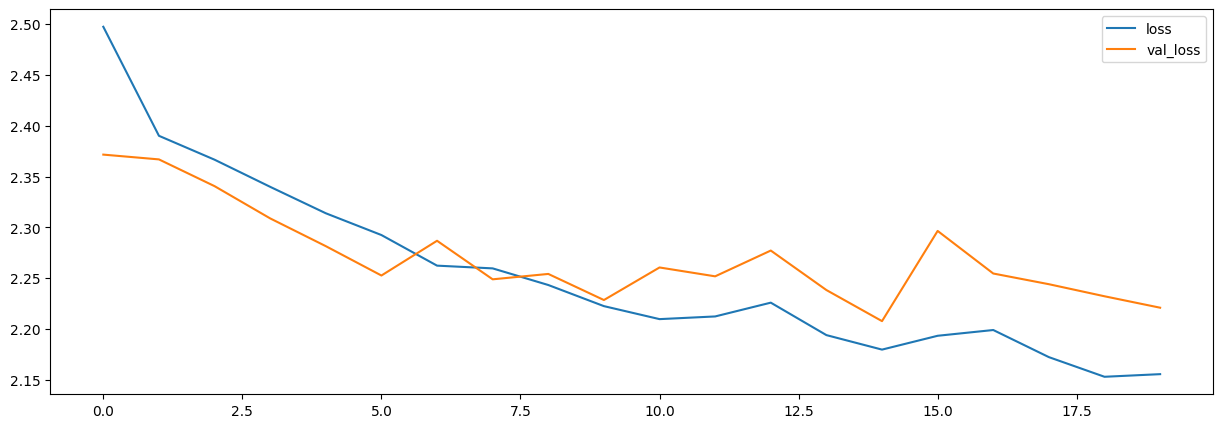

In [20]:
plt.figure(figsize = (15,5))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### LSTM 모델링
- 시퀀스의 길이가 길어질수록 SimpleRNN의 기울기 소실 문제가 크게 발생!
- 초기의 기억에 대한 값이 시간이 지날 수록 흐려진다
- 이를 보완하기 위해 기억의 중요성을 관리하는 연산이 추가됨
 -> LSTM 개발
- 중요한 기억은 오래가도록, 불필요한 기억은 삭제되도록 관리

In [21]:
from tensorflow.keras.layers import LSTM

In [22]:
model2 = Sequential()
model2.add(InputLayer(input_shape = (120,1)))
model2.add(LSTM(128))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(46, activation = 'softmax'))

In [23]:
# 학습 평가 방법 설정
model2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
history2 = model2.fit(X_train_pad_reshape,y_train, validation_split = 0.3, epochs = 30 )

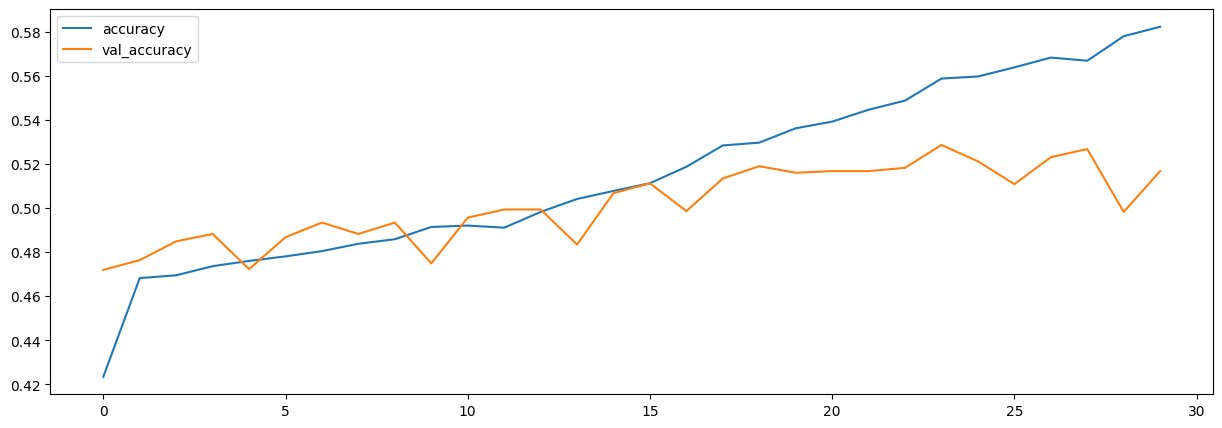

In [26]:
plt.figure(figsize = (15,5))
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

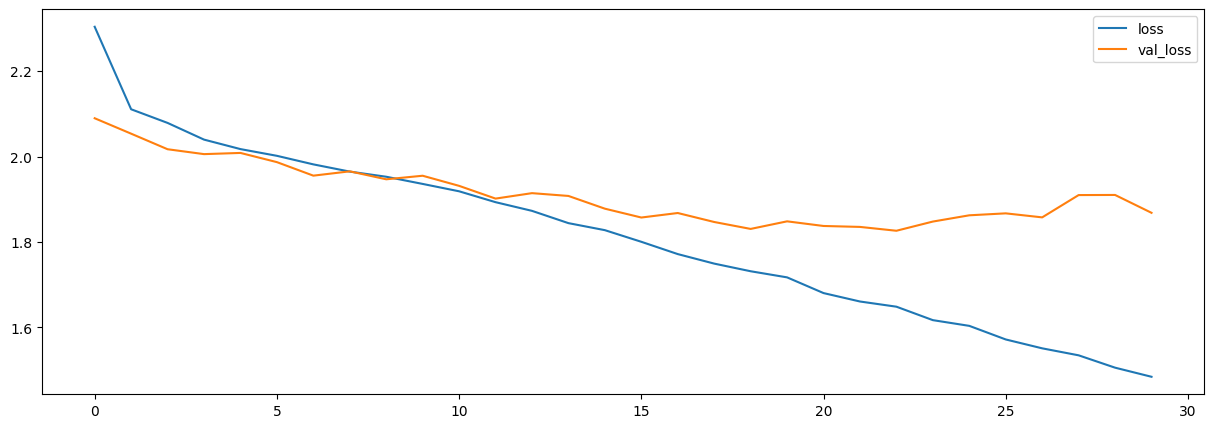

In [27]:
plt.figure(figsize = (15,5))
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### 워드 임베딩
- 현재 로이터 뉴스는 빈도수를 기준으로 수치화 되어있는 상태!
- 단어의 본질적 의미를 이해하고 학습시키기 위해, 단순한 단어 구분을 위한 수치화가 아닌 단어의 의미에 따라 세부적으로 만들어진 실수 형태의 표현법 필요!

In [28]:
from tensorflow.keras.layers import Embedding

In [29]:
model3 = Sequential()
# 전체 기사에 등장하는 단어 종류는 총 1000개, 50개의 숫자 패턴(실수 형태)
model3.add(Embedding(1000, 50 ))  # 사용되는 단어의 수, 각 단어를 표현할 실수의 수
model3.add(InputLayer(input_shape = (120, 1)))
model3.add(LSTM(128))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(46, activation='softmax'))

In [30]:
# 학습 평가 방법 설정
model3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [31]:
history3 = model3.fit(X_train_pad_reshape, y_train, validation_split=0.3, epochs = 30)

Epoch 1/30
197/197 [==============================] - 52s 249ms/step - loss: 2.5491 - accuracy: 0.3475 - val_loss: 2.3832 - val_accuracy: 0.3532
Epoch 2/30
197/197 [==============================] - 7s 38ms/step - loss: 2.1746 - accuracy: 0.4406 - val_loss: 1.9978 - val_accuracy: 0.4957
Epoch 3/30
197/197 [==============================] - 5s 23ms/step - loss: 1.9111 - accuracy: 0.4945 - val_loss: 1.7664 - val_accuracy: 0.5377
Epoch 4/30
197/197 [==============================] - 3s 15ms/step - loss: 1.8217 - accuracy: 0.5204 - val_loss: 1.7867 - val_accuracy: 0.5102
Epoch 5/30
197/197 [==============================] - 2s 12ms/step - loss: 1.7179 - accuracy: 0.5526 - val_loss: 1.6910 - val_accuracy: 0.5540
Epoch 6/30
197/197 [==============================] - 3s 13ms/step - loss: 1.6284 - accuracy: 0.5785 - val_loss: 1.5802 - val_accuracy: 0.5955
Epoch 7/30
197/197 [==============================] - 4s 18ms/step - loss: 1.5635 - accuracy: 0.6019 - val_loss: 1.6647 - val_accuracy: 0.58

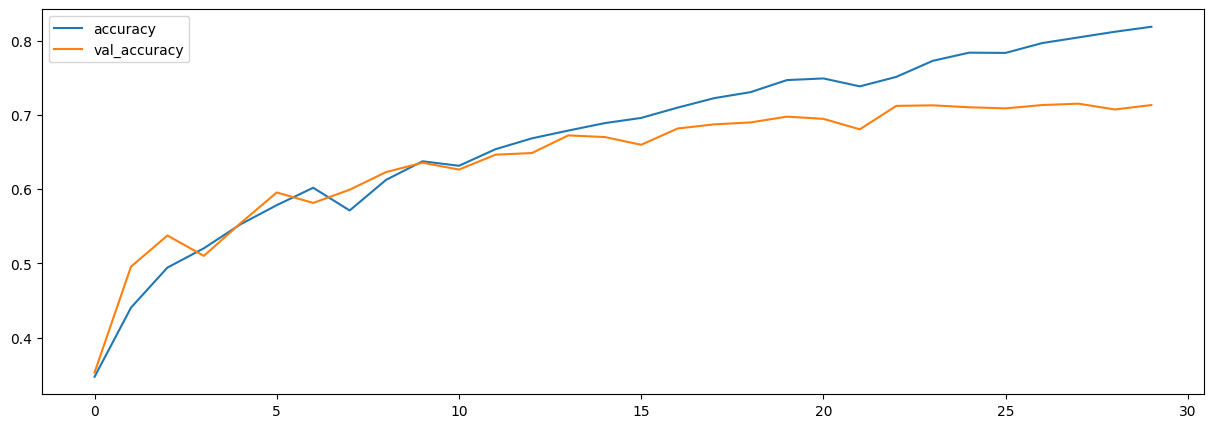

In [32]:
plt.figure(figsize = (15,5))
plt.plot(history3.history['accuracy'], label = 'accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

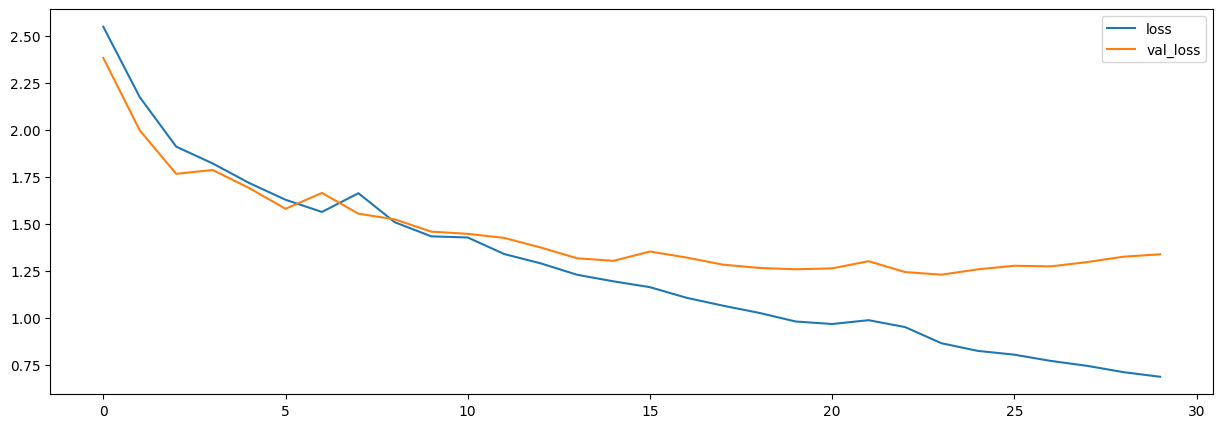

In [33]:
plt.figure(figsize = (15,5))
plt.plot(history3.history['loss'], label = 'loss')
plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()